In [1]:
import sys
sys.path.append("../")
import scanpy as sc
from CellDART import CellDARTModel

### Loading preprocessed data

In [2]:
adata_cortex = sc.read_h5ad("../data/preprocessed/adata_cortex.h5ad")
adata_spatial_anterior = sc.read_h5ad("../data/preprocessed/adata_spatial_anterior.h5ad")

### Integrated `pytorch-lightning` interface for CellDART

In [3]:
model = CellDARTModel(adata_cortex, adata_spatial_anterior, "cell_subclass", 
                      alpha=2, alpha_lr=5, N_sc_mixture=20000, batch_size=512)

Global seed set to 0
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


In [4]:
model.fit()

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


#################Pretrain Phase#################



  | Name              | Type       | Params
-------------------------------------------------
0 | f_extractor       | Sequential | 302 K 
1 | source_classifier | Sequential | 1.9 K 
2 | domain_classifier | Sequential | 2.2 K 
-------------------------------------------------
306 K     Trainable params
0         Non-trainable params
306 K     Total params
1.225     Total estimated model params size (MB)
/home/poncey/miniconda3/envs/SpaT/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:132: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/poncey/miniconda3/envs/SpaT/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (40) is smaller than the logging interval Trainer

Training: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name              | Type       | Params
-------------------------------------------------
0 | f_extractor       | Sequential | 302 K 
1 | source_classifier | Sequential | 1.9 K 
2 | domain_classifier | Sequential | 2.2 K 
-------------------------------------------------
306 K     Trainable params
0         Non-trainable params
306 K     Total params
1.225     Total estimated model params size (MB)


#################Adaption Phase#################


Training: 0it [00:00, ?it/s]

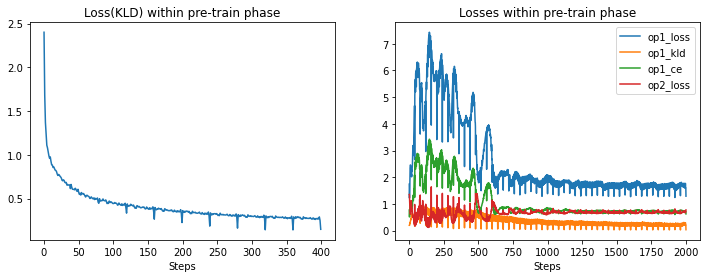

In [5]:
model.plot_fitting_process()

In [6]:
pred_sp = model.predict()

{0: nan, 1: 'L2/3 IT', 2: 'Macrophage', 3: 'SMC', 4: 'L5 IT', 5: 'Sst', 6: 'NP', 7: 'VLMC', 8: 'Astro', 9: 'Oligo', 10: 'L4', 11: 'Pvalb', 12: 'High Intronic', 13: 'Low Quality', 14: 'L5 PT', 15: 'L6 CT', 16: 'Endo', 17: 'Peri', 18: 'Serpinf1', 19: 'Doublet', 20: 'L6b', 21: 'L6 IT', 22: 'Batch Grouping', 23: 'No Class', 24: 'CR', 25: 'Lamp5', 26: 'Meis2', 27: 'Sncg', 28: 'Vip'}


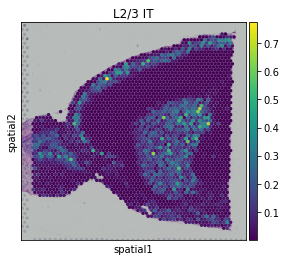

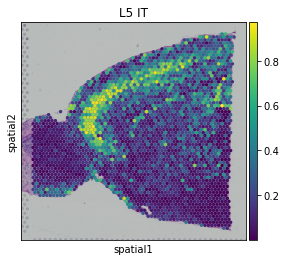

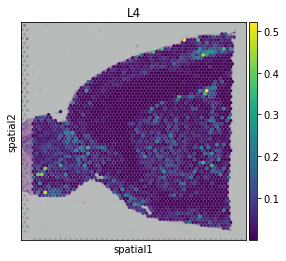

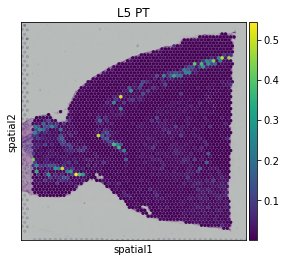

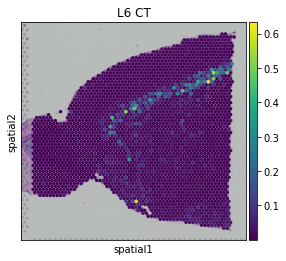

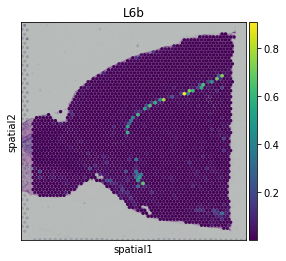

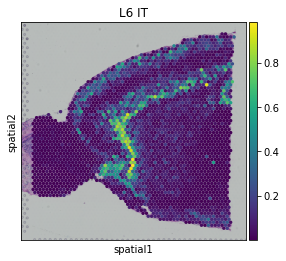

In [7]:
def plot_cellfraction(visnum, sc_sub_dict):
    adata_spatial_anterior.obs['Pred_label'] = pred_sp[:,visnum]
    sc.pl.spatial(
        adata_spatial_anterior,
        img_key="hires",
        color='Pred_label',
        palette='Set1',
        size=1.5,
        legend_loc=None,
        title = sc_sub_dict[visnum])
print(model.module.ctype_dict)

ctype_interested = ['L2/3 IT', 'L4', 'L5 IT', 'L5 PT', 'L6b', 'L6 CT', 'L6 IT']
ctype_interested = list(filter(lambda a: a[1] in ctype_interested, model.module.ctype_dict.items()))
for (num, _) in ctype_interested:
    plot_cellfraction(num, model.module.ctype_dict)